In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, roc_auc_score, precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

data = pd.read_csv('BankChurners.csv')
data

#drop rows where at least one element is missing
data.shape
data = data.dropna()


#removes the unknown data from education level, Marital Status ans Income 
unknown = data[(data['Education_Level'] !='Unknown') & (data['Marital_Status'] !='Unknown') & (data['Income_Category'] !='Unknown')]
unknown


#drop columns
newdata = unknown.drop(['CLIENTNUM', 'Contacts_Count_12_mon', 'Months_Inactive_12_mon','Total_Ct_Chng_Q4_Q1', 'Total_Amt_Chng_Q4_Q1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
                   ], axis = 1)

newdata.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,12691.0,777,11914.0,1144,42,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,8256.0,864,7392.0,1291,33,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,3418.0,0,3418.0,1887,20,0.000
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,4716.0,0,4716.0,816,28,0.000
5,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,4010.0,1247,2763.0,1088,24,0.311


In [2]:
#Coverting variables into factors

newdata.Gender = newdata.Gender.replace({'F':1,'M':0})
newdata.Attrition_Flag = newdata.Attrition_Flag.replace({'Attrited Customer':0,'Existing Customer':1})
newdata.Marital_Status = newdata.Marital_Status.replace({'Married':1,'Single':0,'Divorced':2})
newdata.Income_Category = newdata.Income_Category.replace({'$40K - $60K':1,'$60K - $80K':2,'$80K - $120K':3,'$120K +':4,'Less than $40K':0})
newdata.Education_Level = newdata.Education_Level.replace({'High School':1,'College':2,'Graduate':3,'Post-Graduate':4,'Uneducated':0,'Doctorate':5})
newdata.Card_Category = newdata.Card_Category.replace({'Silver':1,'Gold':2,'Platinum':3,'Blue':0})
newdata

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,1,45,0,3,1,1,2,0,39,5,12691.0,777,11914.0,1144,42,0.061
1,1,49,1,5,3,0,0,0,44,6,8256.0,864,7392.0,1291,33,0.105
2,1,51,0,3,3,1,3,0,36,4,3418.0,0,3418.0,1887,20,0.000
4,1,40,0,3,0,1,2,0,21,5,4716.0,0,4716.0,816,28,0.000
5,1,44,0,2,3,1,1,0,36,3,4010.0,1247,2763.0,1088,24,0.311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10120,1,54,0,1,1,0,2,0,34,5,13940.0,2109,11831.0,15577,114,0.151
10121,1,56,1,1,3,0,0,0,50,4,3688.0,606,3082.0,14596,120,0.164
10122,1,50,0,2,3,0,1,0,40,3,4003.0,1851,2152.0,15476,117,0.462
10124,0,44,1,1,1,1,0,0,36,5,5409.0,0,5409.0,10291,60,0.000


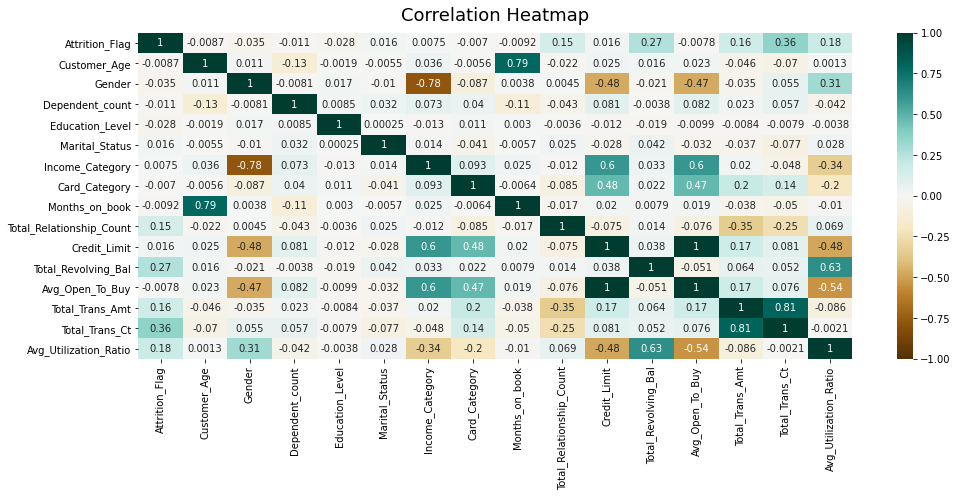

In [3]:
#we created heatmap to verify correlation between variables and eleminated correlated variables
#correlation ranges from 0 to 1, if the numeric is near to one the variables are highly correlated and may affect modelling.

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(newdata.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [4]:
#The correlation for this variables with other two variables Total_trans_Amt-Total Trans ct,Customer Age-Months on Book,

newdata.drop(['Customer_Age','Total_Trans_Amt'], axis=1, inplace=True)
newdata

,Attrition_Flag,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Ct,Avg_Utilization_Ratio
0,1,0,3,1,1,2,0,39,5,12691.0,777,11914.0,42,0.061
1,1,1,5,3,0,0,0,44,6,8256.0,864,7392.0,33,0.105
2,1,0,3,3,1,3,0,36,4,3418.0,0,3418.0,20,0.000
4,1,0,3,0,1,2,0,21,5,4716.0,0,4716.0,28,0.000
5,1,0,2,3,1,1,0,36,3,4010.0,1247,2763.0,24,0.311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10120,1,0,1,1,0,2,0,34,5,13940.0,2109,11831.0,114,0.151
10121,1,1,1,3,0,0,0,50,4,3688.0,606,3082.0,120,0.164
10122,1,0,2,3,0,1,0,40,3,4003.0,1851,2152.0,117,0.462
10124,0,1,1,1,1,0,0,36,5,5409.0,0,5409.0,60,0.000


In [5]:
#using train test split to split train test data
#descision tree model comes with way to summerize feature importance which will help us to decide which features are imp for our prediction
#After being fit, the model provides a feature_importances_ property that can be accessed to retrieve the relative importance scores for each input feature.
train, test = train_test_split(newdata, test_size=0.2)

#dropping attrition flag as it is outcome variable
Train_X = np.array(train.drop(['Attrition_Flag'],1))


Train_y = np.array(train['Attrition_Flag'])


model = DecisionTreeClassifier()
# fit the model
model.fit(Train_X, Train_y)

# get importance
importance = model.feature_importances_
column_list=list((train.drop(['Attrition_Flag'],1)).columns)
# summarize feature importance
data={'Features': column_list, 'Importance':model.feature_importances_ }
df = pd.DataFrame(data)
df

,Features,Importance
0,Gender,0.018643
1,Dependent_count,0.030670
2,Education_Level,0.028679
3,Marital_Status,0.016658
4,Income_Category,0.024624
5,Card_Category,0.008654
6,Months_on_book,0.073332
7,Total_Relationship_Count,0.123137
8,Credit_Limit,0.055148
9,Total_Revolving_Bal,0.235158


In [6]:
Test_X = np.array(test.drop(['Attrition_Flag'],1))


Test_y = np.array(test['Attrition_Flag'])
Test_y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [7]:
#Predicting outcome on the basis of test data
Test_y_predicted = model.predict(Test_X)

Test_y_predicted, Test_y

(array([1, 1, 1, ..., 1, 1, 1], dtype=int64),
 array([1, 1, 1, ..., 1, 1, 1], dtype=int64))

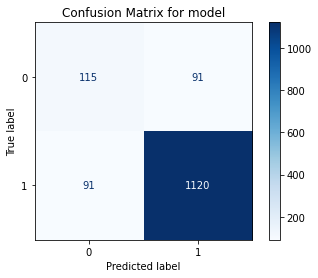

In [8]:
disp = plot_confusion_matrix(model, Test_X, Test_y,
                                 display_labels=model.classes_,
                                 cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix for model")

plt.show()

In [9]:
print(classification_report(Test_y,Test_y_predicted))
print("Accuracy: %.2f%%" % (accuracy_score(Test_y, Test_y_predicted)*100.0))
print("Recall: %.2f%%" % ((recall_score(Test_y,Test_y_predicted))*100.0))
print("Precision: %.2f%%" % ((precision_score(Test_y,Test_y_predicted))*100.0))

              precision    recall  f1-score   support

           0       0.56      0.56      0.56       206
           1       0.92      0.92      0.92      1211

    accuracy                           0.87      1417
   macro avg       0.74      0.74      0.74      1417
weighted avg       0.87      0.87      0.87      1417

Accuracy: 87.16%
Recall: 92.49%
Precision: 92.49%


In [10]:
#As we can see with decision tree we are getting good accuracy but a  recall value is also present. 
#In our problem we cannot afford to have recall as this will meant we missclassified existing customers to those who already left
#so we decided to drop less imp features and fit again a model

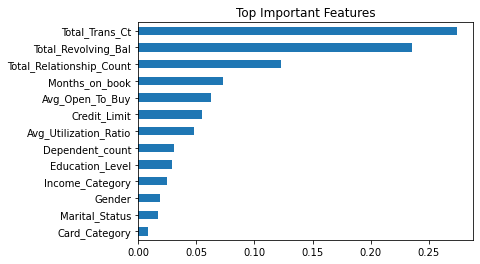

In [11]:
feat_importances = pd.Series(model.feature_importances_, index=(train.drop(['Attrition_Flag'],1)).columns)
feat_importances.nlargest(13).sort_values().plot(kind='barh')
plt.title("Top Important Features")
plt.show()

In [12]:
newdata.drop(['Gender', 'Dependent_count','Education_Level','Months_on_book','Marital_Status','Card_Category'], axis=1, inplace=True)
newdata

,Attrition_Flag,Income_Category,Total_Relationship_Count,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Ct,Avg_Utilization_Ratio
0,1,2,5,12691.0,777,11914.0,42,0.061
1,1,0,6,8256.0,864,7392.0,33,0.105
2,1,3,4,3418.0,0,3418.0,20,0.000
4,1,2,5,4716.0,0,4716.0,28,0.000
5,1,1,3,4010.0,1247,2763.0,24,0.311
...,...,...,...,...,...,...,...,...
10120,1,2,5,13940.0,2109,11831.0,114,0.151
10121,1,0,4,3688.0,606,3082.0,120,0.164
10122,1,1,3,4003.0,1851,2152.0,117,0.462
10124,0,0,5,5409.0,0,5409.0,60,0.000


In [13]:
train, test = train_test_split(newdata, test_size=0.2)
Train_X = np.array(train.drop(['Attrition_Flag'],1))


Train_y = np.array(train['Attrition_Flag'])


classifier = LogisticRegression(random_state = 0)
classifier.fit(Train_X, Train_y)
# get importance
importance = classifier.coef_[0]
column_list=list((train.drop(['Attrition_Flag'],1)).columns)
data={'Features': column_list, 'Coefficients':classifier.coef_[0] }
df = pd.DataFrame(data)
df

,Features,Coefficients
0,Income_Category,0.000092
1,Total_Relationship_Count,0.001094
2,Credit_Limit,0.000180
3,Total_Revolving_Bal,0.000384
4,Avg_Open_To_Buy,-0.000204
5,Total_Trans_Ct,0.025381
6,Avg_Utilization_Ratio,0.000027


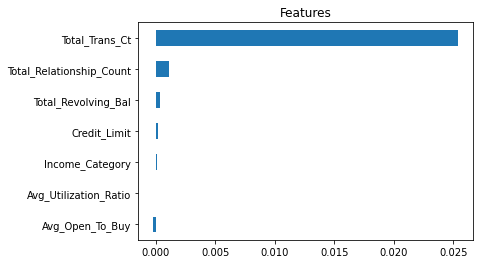

In [14]:
feat_importances = pd.Series(classifier.coef_[0], index=(train.drop(['Attrition_Flag'],1)).columns)
feat_importances.nlargest(7).sort_values().plot(kind='barh')
plt.title("Features")
plt.show()

In [15]:
classifier.coef_

array([[ 9.15739425e-05,  1.09356383e-03,  1.79967803e-04,
         3.83897722e-04, -2.03929918e-04,  2.53814193e-02,
         2.72845410e-05]])

In [16]:
# intercept of the model
print('\nIntercept of model',classifier.intercept_)


Intercept of model [0.0001876]


In [17]:
Test_X = np.array(test.drop(['Attrition_Flag'],1))


Test_y = np.array(test['Attrition_Flag'])
Test_y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [18]:
#Predicting outcome on the basis of test data
Test_y_predicted = classifier.predict(Test_X)

Test_y_predicted, Test_y

(array([1, 1, 1, ..., 1, 1, 1], dtype=int64),
 array([1, 1, 1, ..., 1, 1, 1], dtype=int64))

In [19]:
from sklearn.metrics import mean_squared_error
import math
mse=mean_squared_error(Test_y, Test_y_predicted)


#calculating rmse value
rmse = math.sqrt(mse)
print(rmse)

0.40982981820151326


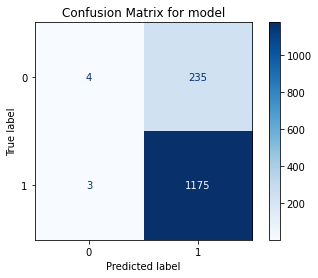

In [20]:
#A confusion matrix gives you complete picture of how the classifier is performing. It also allows you to compute various classification metrics and these metrics can guide your model selection.

#creating confusion matrix 
disp = plot_confusion_matrix(classifier, Test_X, Test_y,
                                 display_labels=classifier.classes_,
                                 cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix for model")

plt.show()


In [21]:

print(classification_report(Test_y,Test_y_predicted))
print("Accuracy: %.2f%%" % (accuracy_score(Test_y, Test_y_predicted)*100.0))
print("Recall: %.2f%%" % ((recall_score(Test_y,Test_y_predicted))*100.0))
print("Precision: %.2f%%" % ((precision_score(Test_y,Test_y_predicted))*100.0))

              precision    recall  f1-score   support

           0       0.57      0.02      0.03       239
           1       0.83      1.00      0.91      1178

    accuracy                           0.83      1417
   macro avg       0.70      0.51      0.47      1417
weighted avg       0.79      0.83      0.76      1417

Accuracy: 83.20%
Recall: 99.75%
Precision: 83.33%


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.844


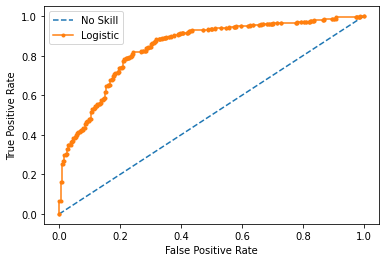

In [22]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Test_y))]

# predict probabilities
lr_probs = classifier.predict_proba(Test_X)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Test_y, ns_probs)
lr_auc = roc_auc_score(Test_y, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Test_y, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Test_y, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()